In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### В качестве данных возьмем теже данные (из первой лабораторной работы) о последних 30 кинофильмах, получивших «Оскар» как самый лучший фильм.

In [70]:
new_data = pd.read_csv('movies.csv')
new_data.columns = ['Name','Year', 'Rat', 'Length', 'Genre', 'Budget', 'box_office']
#new_data = new_data.drop(index=[14, 20, 23])
new_data

,Name,Year,Rat,Length,Genre,Budget,box_office
0,Форма воды,2017,6.914,123,"фантастика, драма",19.4,195.243464
1,Лунный свет,2016,6.151,110,драма,1.5,65.046687
2,В центре внимания,2015,7.489,129,"драма, криминал, история",20.0,88.346473
3,Бёрдмэн,2014,7.604,119,"драма, комедия",18.0,103.215094
4,12 лет рабства,2013,7.710,133,"драма, биография, история",20.0,178.371993
5,Операция «Арго»,2012,7.517,120,"триллер, драма, биография",44.5,232.324128
6,Артист,2011,7.942,96,"драма, мелодрама, комедия",15.0,133.432856
7,Король говорит!,2010,7.977,118,"драма, биография, история",15.0,414.211549
8,Повелитель бури,2008,7.298,126,"триллер, драма, военный, история",15.0,49.230772
9,Миллионер из трущоб,2008,7.724,120,"драма, мелодрама",15.0,377.910544


##### В первой лабораторной рассматавалась ПЛР регрессора Rat (объясняющий фактор - рейтинг) и регрессанат box_office (целевой фактор - итоговые сборы в млн. долл.)

##### В качестве дополнительного объясняющего фактора выберем данные Budget, о бюджете в млн. долл. на производство фильма.

In [71]:
X = np.array(new_data[['Budget', 'Rat']].values)
Y = np.array(new_data[['box_office']].values)

Построим матрицу корреляций между всеми параметрами данных.

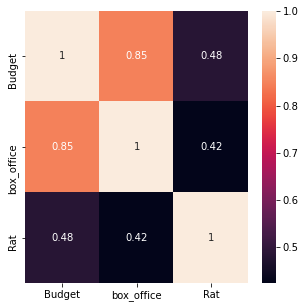

In [72]:
plt.figure(figsize = (5, 5))
seaborn.heatmap(new_data[['Budget', 'box_office', 'Rat']].corr().abs(), cbar = True, annot=True)

Видим сильную корреляцию между признаками "Budget" и 'box_office' <br>
И слабую корреляцию между 'box_office' и 'Rat' <br>
Объясняющие факторы слабо коррелируют между собой

### 	Постройте парные линейные регрессии показателя от каждого из факторов, взятых по отдельности. Вычислите коэффициенты обеих ПЛ и коэффициенты детерминации

In [73]:
reg = LinearRegression()
reg.fit(X[:,0].reshape(-1,1), Y)

LinearRegression()

In [74]:
reg2 = LinearRegression()
reg2.fit(X[:,1].reshape(-1,1), Y)

LinearRegression()

#### Коэффициены регресии

In [75]:
k , b = reg.coef_[0][0], reg.intercept_[0]
print('coefs for first feature')
print('coef: ', k)
print('intercept: ',  b)
k , b = reg2.coef_[0][0], reg2.intercept_[0]
print('\ncoefs for second feature')
print('coef: ', k)
print('intercept: ',  b)

coefs for first feature
coef:  8.471216134028769
intercept:  26.426158785601217

coefs for second feature
coef:  299.06290167845907
intercept:  -2022.1696914389581


##### Вычислим коэф. детерминации. <br>
Видно, что процент объяснённой дисперсии невысок для обоих факторов.

In [76]:
print('r^2 для первого признака: ', reg.score(X[:,0].reshape(-1,1), Y))
print('r^2 для второго признака: ', reg2.score(X[:,1].reshape(-1,1), Y))

r^2 для первого признака:  0.7206343300368265
r^2 для второго признака:  0.18021440564556068


### Вычислите коэффициенты уравнения множественной линейной регрессии в матричной форме, запишите уравнение регрессии в развёрнутой форме.

In [77]:
X_with_const = sm.add_constant(X)

In [78]:
w = np.linalg.inv((X_with_const.T).dot(X_with_const)).dot(X_with_const.T).dot(Y)

In [79]:
print(w)

[[-70.18797147]
 [  8.38481229]
 [ 12.60444655]]


In [80]:
print(w[0][0],'+', w[1][0],'*a +', w[2][0], '*b')

-70.18797146656243 + 8.384812287299871 *a + 12.604446553946104 *b


### Вычислите расчетные значения показателя и остатки.

In [81]:
pred = X_with_const.dot(w) 

In [82]:
tail = Y - pred

### Вычислите и сравните частные и парные коэффициенты корреляции.
Коэффициенты парной корреляции:

In [83]:
corrs = new_data[['Budget', 'box_office', 'Rat']].corr()
print(corrs)
corrs = np.array(corrs)

              Budget  box_office       Rat
Budget      1.000000    0.848902  0.483937
box_office  0.848902    1.000000  0.424517
Rat         0.483937    0.424517  1.000000


Коэффициенты частной корреляции:

In [90]:
print('r(yx1|x2): ', (corrs[0,2] - corrs[1,2]*corrs[1,0]) / ((1-corrs[1,2]**2)*(1-corrs[1,0]**2))**.5)
print('r(yx2|x1): ', (corrs[1,2] - corrs[0,2]*corrs[1,0]) / ((1-corrs[0,2]**2)*(1-corrs[1,0]**2))**.5)

r(yx1|x2):  0.2581994082422286
r(yx2|x1):  0.029622968311098473


Отсюда видно, что второй признак почти не оказывает влияния на регрессант.

### Найдите величину средней относительной ошибки аппроксимации и оценку для дисперсии остатков.
Величина средней относительной ошибки находится на уровне 56%, что является плохим результатом.

In [85]:
mape = np.mean(np.abs((tail) / Y)) * 100
print('Средняя относительная ошибка аппроксимации: ', mape,'%')
print('Несмещённая оценка дисперсии остатков: ', np.std(tail))

Средняя относительная ошибка аппроксимации:  56.08238393442419 %
Несмещённая оценка дисперсии остатков:  210.137972064464


In [86]:
print('r^2 для первого признака: ', reg.score(X[:,0].reshape(-1,1), Y))
print('r^2 для второго признака: ', reg2.score(X[:,1].reshape(-1,1), Y))

r^2 для первого признака:  0.7206343300368265
r^2 для второго признака:  0.18021440564556068


### Вычислите множественный коэффициент детерминации и сравните его  с коэффициентами детерминации найденных ранее ПЛ. Вычислите коэффициент детерминации Тейла

In [87]:
est = sm.OLS(Y, X_with_const)
est2 = est.fit()
est.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     34.87
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           3.30e-08
Time:                        18:28:03   Log-Likelihood:                -203.00
No. Observations:                  30   AIC:                             412.0
Df Residuals:                      27   BIC:                             416.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.1880    629.874     -0.111      0.912   -1362.582    1222.206
x1             8.3848      1.159      7.232      0.000       6.006      10.764
x2            12.6044     81.851      0.154      0.879    -155.339     180.548
==============================================================================
Omnibus:                        2.628   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.374
Skew:                          -0.447   Prob(JB):                        0.503
Kurtosis:                       3.548   Cond. No.                         869.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэф. Тейла = 0.7 ниже чем коэф. детерминации = 0.721 для парной регресии.<br>
Коэф. детерминации для одиночной регрессии почти такой же как для парной. Что говорит о том, что второй признак почти не влияет на целевую переменную.

### Проверьте статистическую значимость полученных значений параметров регрессии с помощью критерия Стьюдента и критерия Фишера.

#### Критерий Стьюдента

p_val_const = 0.912 > 0.05 => значит константный признак незначимый <br>

p_val_x1 < 0.05 => признак значимый <br>

p_val_x2 > 0.05 => признак не значимый

#### Критерий Фишера 
F_prob = 3.30e-08 < 0.05 => данное построенное уравнение МЛР является статичтически значимым

### Постройте точечный прогноз значения y для фиксированного x. Вычислите стандартную ошибку и доверительный интервал полученного прогноза.

In [91]:
est2.get_prediction(X_with_const[0]).summary_frame()[['mean', 'mean_se','mean_ci_lower','mean_ci_upper']]

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,179.62453,85.007856,5.202817,354.046243


mean - точечный прогноз значения Y = 179.62453

mean_se - стандартная ошибка = 85.007856

доверительный интервал:<br>
Нижняя граница - mean_ci_lower = 5.202817	<br>
Верхняя граница - mean_ci_upper = 354.046243